# K-Means Clustering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import pandas as pd

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import fcluster

In [8]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589739 entries, 0 to 589738
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   cyclist_url                   589739 non-null  object        
 1   cyclist_name                  589739 non-null  object        
 2   birth_year                    589739 non-null  int64         
 3   weight                        480007 non-null  float64       
 4   height                        480007 non-null  float64       
 5   nationality                   589739 non-null  object        
 6   race_url                      589739 non-null  object        
 7   race_name                     589739 non-null  object        
 8   points                        589739 non-null  float64       
 9   uci_points                    422184 non-null  float64       
 10  length                        589739 non-null  float64       
 11  climb_total  

In [9]:
# Select relevant columns for clustering
columns_to_use = ['length', 'race_prestige', 'race_physical_effort']
dataset = dataset[columns_to_use].drop_duplicates()

In [10]:
# Gestione dei valori mancanti
data_for_clustering = dataset.dropna() #TODO: remove when we have imputed the missing values

# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

In [11]:
# Applicazione del K-Means
n_clusters = 7  # Puoi modificare il numero di cluster
kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100, random_state=42)
kmeans.fit(data_scaled)

KMeans(max_iter=100, n_clusters=7, n_init=10, random_state=42)

In [12]:
# Etichette dei cluster e centroidi
cluster_labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Aggiunta delle etichette al dataset originale
data_for_clustering['cluster'] = cluster_labels

# Calcolo dei punteggi di valutazione
sse = kmeans.inertia_  # Sum of Squared Errors
silhouette_avg = silhouette_score(data_scaled, cluster_labels)  # Silhouette Score

print(f"SSE (Sum of Squared Errors): {sse}")
print(f"Silhouette Score: {silhouette_avg}")


/var/folders/6w/jr75hz4j1mnfxpxpb_7px5b40000gn/T/ipykernel_10151/2175171880.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['cluster'] = cluster_labels


SSE (Sum of Squared Errors): 1934.9234733759736
Silhouette Score: 0.40355505347353343


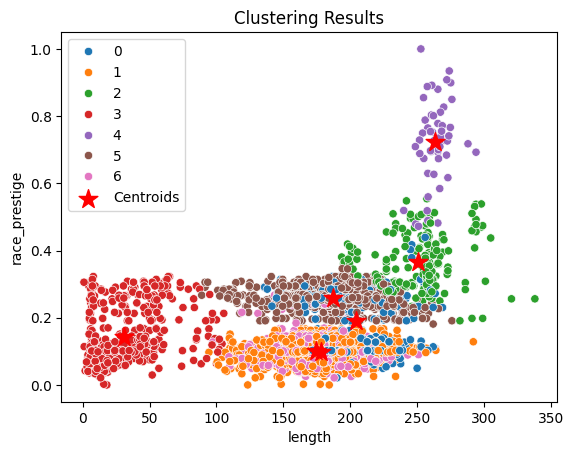

In [13]:
# Visualizzazione con scatterplot (prendendo due dimensioni come esempio)
sns.scatterplot(
    data=data_for_clustering,
    x="length", y="race_prestige", hue="cluster", palette="tab10"
)
plt.scatter(
    scaler.inverse_transform(centers)[:, 0],
    scaler.inverse_transform(centers)[:, 1],
    s=200, c='red', marker='*', label='Centroids'
)
plt.title('Clustering Results')
plt.legend()
plt.show()


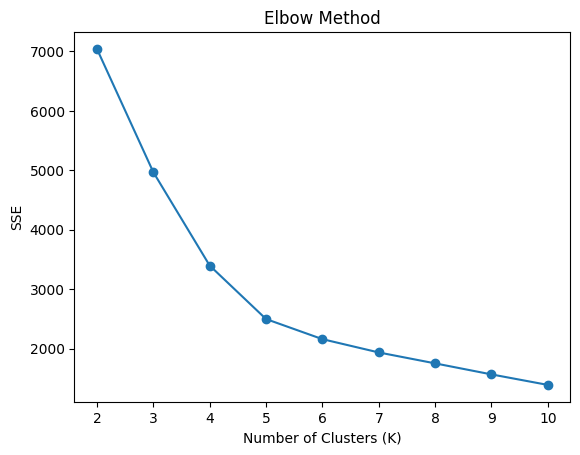

In [14]:
# Calcolo dell'SSE per diversi valori di K
sse_list = []
max_k = 10  # Puoi aumentare per provare più cluster
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=42)
    kmeans.fit(data_scaled)
    sse_list.append(kmeans.inertia_)

# Visualizzazione del metodo del gomito
plt.plot(range(2, max_k + 1), sse_list, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


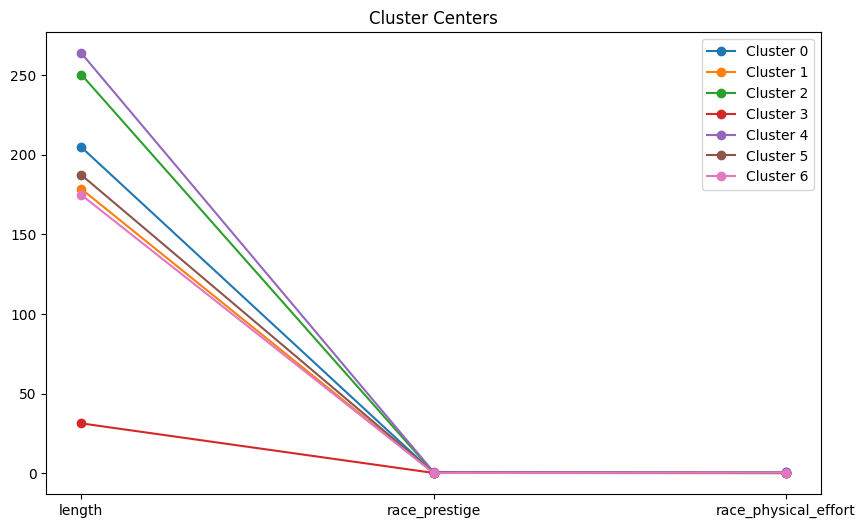

In [15]:
# Centroidi riportati alle scale originali
centers_original = scaler.inverse_transform(centers)

# Visualizzazione parallela dei centroidi
plt.figure(figsize=(10, 6))
for i in range(len(centers_original)):
    plt.plot(centers_original[i], marker='o', label=f'Cluster {i}')
plt.xticks(range(len(columns_to_use)), columns_to_use)
plt.title('Cluster Centers')
plt.legend()
plt.show()


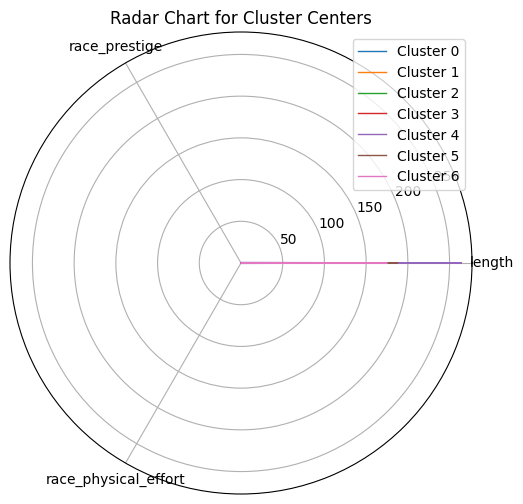

In [16]:
from math import pi

N = len(columns_to_use)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Radar Chart per ogni cluster
plt.figure(figsize=(10, 6))
for i, center in enumerate(centers_original):
    values = center.tolist()
    values += values[:1]
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], columns_to_use)
plt.title('Radar Chart for Cluster Centers')
plt.legend()
plt.show()


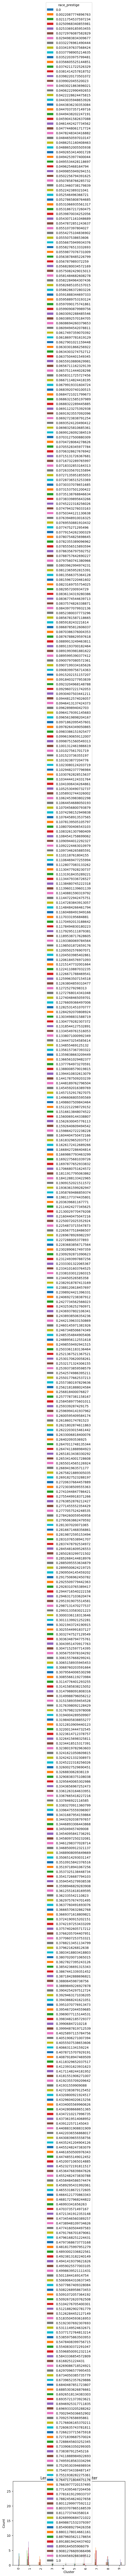

In [19]:
cross_df = pd.crosstab(kmeans.labels_, data_for_clustering['race_prestige'])
cross_df.plot(kind='bar', stacked=False, title='Length distribution per cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()